## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

Reading the data files

In [4]:
train = pd.read_csv("C:/Users/mrinal.ghoshal/Desktop/Assingment/data/train_data.csv")
test = pd.read_csv('C:/Users/mrinal.ghoshal/Desktop/Assingment/data/test_data.csv')
campaign = pd.read_csv('C:/Users/mrinal.ghoshal/Desktop/Assingment/data/campaign_data.csv')
coupons = pd.read_csv('C:/Users/mrinal.ghoshal/Desktop/Assingment/data/coupon_item_mapping.csv')
cust_demo = pd.read_csv('C:/Users/mrinal.ghoshal/Desktop/Assingment/data/customer_demographics.csv')
cust_tran = pd.read_csv('C:/Users/mrinal.ghoshal/Desktop/Assingment/data/customer_transaction_data.csv')
items = pd.read_csv('C:/Users/mrinal.ghoshal/Desktop/Assingment/data/item_data.csv')

Problem1:


Can you provide customer insights (by demographics, income, personal life, lifestyle etc.) and their propensity to redeem a coupon? Derive which factors come out as significant in identifying customer behaviour and how customers can be grouped based on their characteristics?


In [5]:

customer_info = train.merge(cust_demo, how='left', on='customer_id')
customer_info['info_available'] = customer_info.income_bracket.notna()
customer_info.head()


,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,info_available
0,117578,8,725,45,0,46-55,Married,0.0,5+,3+,1.0,True
1,123337,29,265,334,0,NaN,NaN,NaN,NaN,NaN,NaN,False
2,46642,13,281,408,0,NaN,NaN,NaN,NaN,NaN,NaN,False
3,10510,13,625,577,0,46-55,Married,0.0,3,1,7.0,True
4,14347,13,480,414,0,70+,Married,0.0,2,NaN,6.0,True


In [6]:
coupon_uses ={}

for cp in train.coupon_id.unique():
    # key = number of campaigns that use the coupon
    key = len(train[train.coupon_id==cp].campaign_id.unique())
    #print(key,train[train.coupon_id==cp].campaign_id.unique())
    if key in coupon_uses.keys():
        #collect coupon ids that were used key times
        coupon_uses[key].append(cp)
    else:
        coupon_uses[key] = [cp]
        

5


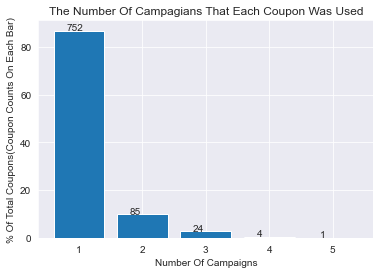

In [7]:
coupon_freq ={}
total_no_unique_coupons = len(train.coupon_id.unique())
#coupon_freq 
#keys: the number of uses of coupons
#values:number of coupons 
for key in coupon_uses.keys():
    coupon_freq[key]= len(coupon_uses[key])/total_no_unique_coupons*100
 

print(len(coupon_freq))
plt.bar(coupon_freq.keys(),coupon_freq.values())

# Text on the top of each barplot
label = [len(x) for x in coupon_uses.values()]
x_loc = np.array([x for x in coupon_freq.keys()])-0.2
y_loc = np.array([x for x in coupon_freq.values()]) + 0.1
for i in range(5):
    plt.text(x = x_loc[i] , y = y_loc[i], s = label[i], size = 10)
plt.title('The number of campagians that each coupon was used'.title())
plt.ylabel('% of total coupons(coupon counts on each bar)'.title())
plt.xlabel('number of campaigns'.title())
plt.show()

In [9]:
coupon_freq = {}
p = {}
cnt = 0

for j in coupons.coupon_id.unique():
    
    key = coupons[coupons.coupon_id == j].item_id
    coupon_freq[(len(key)/92663)*100] = j
    
for i in sorted(coupon_freq.keys(),reverse = True):
    p[i] = coupon_freq[i]
    cnt += 1
    
    if cnt >10:
        break

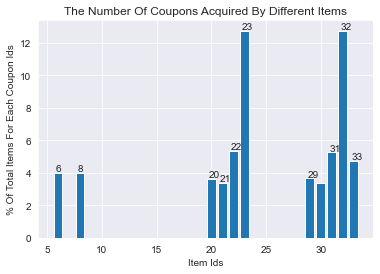

In [10]:
plt.bar(p.values(),p.keys())
label = [x for x in p.values()]
x_loc = np.array([x for x in p.values()])-0.2
y_loc = np.array([x for x in p.keys()]) + 0.1
for i in range(10):
    plt.text(x = x_loc[i] , y = y_loc[i], s = label[i], size = 10)

plt.title('The number of coupons acquired by different items'.title())
plt.ylabel('% of total items for each coupon ids'.title())
plt.xlabel('Item ids'.title())
plt.show()

In [11]:
group_by_incomebracket = customer_info.groupby('income_bracket').agg({'customer_id': 'nunique', 'redemption_status': 'sum'})
group_by_incomebracket.columns = ['num_of_customers', 'redeemed']
group_by_incomebracket = group_by_incomebracket.reset_index()
group_by_incomebracket

,income_bracket,num_of_customers,redeemed
0,1.0,55,23
1,2.0,65,18
2,3.0,64,23
3,4.0,149,55
4,5.0,171,158
5,6.0,80,65
6,7.0,30,11
7,8.0,36,18
8,9.0,28,19
9,10.0,10,5


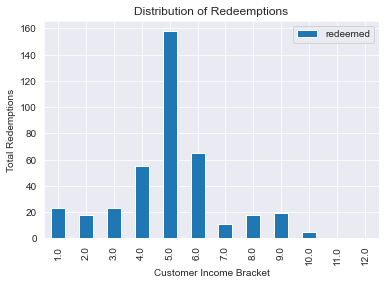

In [12]:
group_by_incomebracket.plot('income_bracket', 'redeemed', kind='bar')
_ = plt.xlabel('Customer Income Bracket')
_ = plt.ylabel('Total Redemptions')
_ = plt.title('Distribution of Redeemptions')
plt.show()

In [13]:
group_by_rented = customer_info.groupby('rented').agg({'customer_id': 'nunique', 'redemption_status': 'sum'})
group_by_rented.columns = ['num_of_customers', 'redeemed']
group_by_rented= group_by_rented.reset_index()
group_by_rented

,rented,num_of_customers,redeemed
0,0.0,663,373
1,1.0,40,22


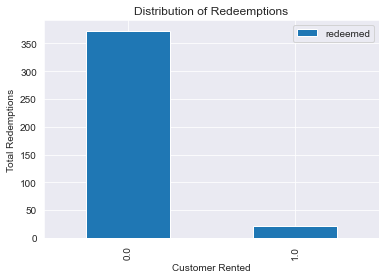

In [14]:
group_by_rented.plot('rented', 'redeemed', kind='bar')
_ = plt.xlabel('Customer Rented')
_ = plt.ylabel('Total Redemptions')
_ = plt.title('Distribution of Redeemptions')
plt.show()

In [15]:
group_by_age = customer_info.groupby('age_range').agg({'customer_id': 'nunique', 'redemption_status': 'sum'})
group_by_age.columns = ['num_of_customers', 'redeemed']
group_by_age= group_by_age.reset_index()
group_by_age

,age_range,num_of_customers,redeemed
0,18-25,40,13
1,26-35,121,78
2,36-45,172,101
3,46-55,252,144
4,56-70,56,36
5,70+,62,23


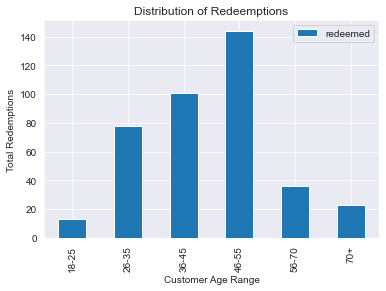

In [16]:
group_by_age.plot('age_range', 'redeemed', kind='bar')
_ = plt.xlabel('Customer Age Range')
_ = plt.ylabel('Total Redemptions')
_ = plt.title('Distribution of Redeemptions')
plt.show()

In [17]:
group_by_maritalstatus = customer_info.groupby('marital_status').agg({'customer_id': 'nunique', 'redemption_status': 'sum'})
group_by_maritalstatus.columns = ['num_of_customers', 'redeemed']
group_by_maritalstatus= group_by_maritalstatus.reset_index()
group_by_maritalstatus

,marital_status,num_of_customers,redeemed
0,Married,304,194
1,Single,102,63


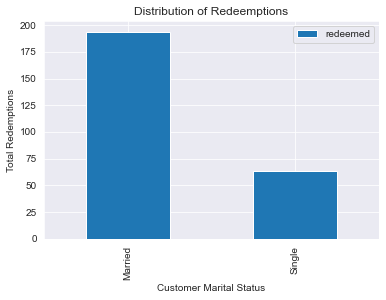

In [18]:
group_by_maritalstatus.plot('marital_status', 'redeemed', kind='bar')
_ = plt.xlabel('Customer Marital Status')
_ = plt.ylabel('Total Redemptions')
_ = plt.title('Distribution of Redeemptions')
plt.show()

In [19]:
group_by_familysize = customer_info.groupby('family_size').agg({'customer_id': 'nunique', 'redemption_status': 'sum'})
group_by_familysize.columns = ['num_of_customers', 'redeemed']
group_by_familysize= group_by_familysize.reset_index()
group_by_familysize

,family_size,num_of_customers,redeemed
0,1,228,122
1,2,277,156
2,3,98,37
3,4,44,43
4,5+,56,37


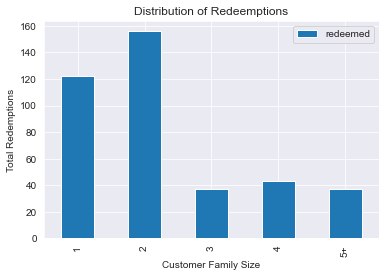

In [20]:
group_by_familysize.plot('family_size', 'redeemed', kind='bar')
_ = plt.xlabel('Customer Family Size')
_ = plt.ylabel('Total Redemptions')
_ = plt.title('Distribution of Redeemptions')
plt.show()

These are the insights that can be drawn from the above plots:

1. More than 80 percent of the coupons were used during the 1st campagian, this shows that the 1st campagian was very effective.

2. Most of the coupons were redeemed by the 5th income bracket

3. From the info available, we can see that non-rented have made the most redemptions.

4. Age group of 45-55 have used most number of coupons

5. Family of 2 people have made most number of redemptions.




In [22]:
customer_info1 = train.merge(cust_demo, how='left', on='customer_id')
customer_info1['info_available'] = customer_info1.income_bracket.notna()

In [23]:
customer_info1.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,info_available
0,117578,8,725,45,0,46-55,Married,0.0,5+,3+,1.0,True
1,123337,29,265,334,0,NaN,NaN,NaN,NaN,NaN,NaN,False
2,46642,13,281,408,0,NaN,NaN,NaN,NaN,NaN,NaN,False
3,10510,13,625,577,0,46-55,Married,0.0,3,1,7.0,True
4,14347,13,480,414,0,70+,Married,0.0,2,NaN,6.0,True


In [24]:
customer_info1 = customer_info1[customer_info1['age_range'].notna()]

In [25]:
customer_info1.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,info_available
0,117578,8,725,45,0,46-55,Married,0.0,5+,3+,1.0,True
3,10510,13,625,577,0,46-55,Married,0.0,3,1,7.0,True
4,14347,13,480,414,0,70+,Married,0.0,2,NaN,6.0,True
5,58994,13,771,844,0,46-55,NaN,0.0,4,2,5.0,True
7,88015,12,783,1412,0,46-55,NaN,0.0,1,NaN,5.0,True


In [26]:
customer_info1=customer_info1.drop(columns=['id', 'campaign_id','coupon_id','info_available','customer_id'])

In [27]:
customer_info1.isnull().sum()

redemption_status        0
age_range                0
marital_status       12740
rented                   0
family_size              0
no_of_children       20704
income_bracket           0
dtype: int64

In [28]:
train.coupon_id.value_counts()

705     412
470     303
691     275
468     258
1043    248
       ... 
389       6
263       6
1026      5
402       5
394       4
Name: coupon_id, Length: 866, dtype: int64

In [29]:
group_by_couponid = train.groupby('coupon_id').agg({'redemption_status': 'sum'})
group_by_couponid.columns = ['redeemed']
group_by_couponid= group_by_couponid.reset_index()
group_by_couponid

,coupon_id,redeemed
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
861,1108,0
862,1110,0
863,1112,0
864,1114,0


In [30]:
top10=group_by_couponid.nlargest(10, ['redeemed'])
top10

,coupon_id,redeemed
577,754,21
535,705,17
441,586,14
603,786,14
351,468,13
501,661,11
511,672,11
729,942,11
21,22,10
20,21,9


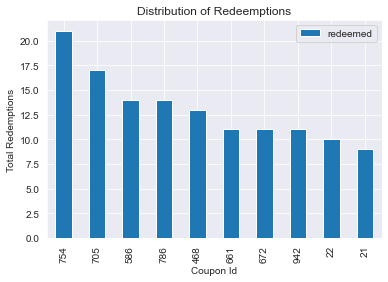

In [31]:
top10.plot('coupon_id', 'redeemed', kind='bar')
_ = plt.xlabel('Coupon Id')
_ = plt.ylabel('Total Redemptions')
_ = plt.title('Distribution of Redeemptions')
plt.show()

This shows the popularity of coupon and the type that is redeemed most

Problem 5:



Can you profile the products/items based on various characteristics like price, item category, propensity to be sold, discount percentage etc.?

In [37]:
group_by_couponid[group_by_couponid['redeemed'] != 0]

group_by_couponid[group_by_couponid['redeemed'] == 0]


,coupon_id,redeemed
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
861,1108,0
862,1110,0
863,1112,0
864,1114,0


In [40]:


item_info = cust_tran.merge(items, how='inner', on='item_id')
item_info.isnull().sum()
item_profile = pd.pivot_table(item_info, index = "category", 
               values=['item_id','quantity','selling_price', 'other_discount','coupon_discount'],
               aggfunc={'item_id':lambda x: len(set(x)),
                        'quantity':np.sum,
                        'selling_price':np.mean,
                        'other_discount':np.mean,
                        'coupon_discount':np.mean
                        
                        } )
item_profile.reset_index(inplace=True)

In [41]:
item_profile['log_quantity'] = np.log(item_profile.quantity)
item_profile.head()

,category,coupon_discount,item_id,other_discount,quantity,selling_price,log_quantity
0,Alcohol,0.000000,303,0.000000,1477,369.721176,7.297768
1,Bakery,-0.102159,1679,-9.962247,25075,117.956141,10.129627
2,"Dairy, Juices & Snacks",-0.237140,2425,-12.712502,27552,107.100653,10.223830
3,Flowers & Plants,-0.377541,664,-2.754875,1898,302.335243,7.548556
4,Fuel,0.000000,14,-30.625934,149824927,930.509512,18.824978


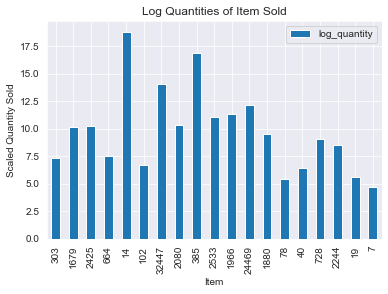

In [42]:
item_profile.plot('item_id', 'log_quantity', kind='bar')
_ = plt.xlabel('Item')
_ = plt.ylabel('Scaled Quantity Sold')
_ = plt.title('Log Quantities of Item Sold')
plt.show()

Quantity of Items sold in log form to see for all items(Scaled)